# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ulfiyah Nahdi Pratista
- **Email:** ulfiyahnahdi@gmail.com
- **ID Dicoding:**pratista

## Menentukan Pertanyaan Bisnis

- Apakah cuaca berdampak pada jumlah pengendara sepeda?

- Apabila sepeda digunakan pada hari kerja, hari libur, dan hari biasa, tren apa yang dapat terjadi dalam setahun?

- Apa pola penggunaan sepeda selama bertahun-tahun? Apakah 2012 atau 2011 lebih baik?

- Apa pengaruh suhu, kelembapan, dan kondisi lainnya terhadap jumlah keseluruhan pengguna sepeda yang biasa maupun terdaftar ?

-Berdasarkan penyewa yang biasa dan terdaftar, apakah ada dampak musim terhadap penyewa sepeda?



## Import Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

##Gathering Data

**Pengumpulan data** yang telah kita download dari web site Kaggle.Saya mendownload Bike Sharing Dataset, maka saya mengimpor file day.csv dan hr.csv

Tabel Day [**Load**]

In [3]:
day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Tabel Hour (hr) [**Load**]

In [4]:
hr_df = pd.read_csv("/content/hour.csv")
hr_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Assessing Data

**Penilaian data day_df**


1.Tipe data day_df sebagai berikut :

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Berdasarkan output diatas kita bisa mengetahui bahwa terdapat 1 tipe data yang tidak matching dengan kolomnya.Data tersebut adalah dteday--->datetime data ini perlu **diperbaiki**.

2.Pengecekan missing value pada data day_df

In [6]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Berdasarkan output diatas kita dapat simpulkan bahwa tabel day_df save yang artinya **tidak terdapat missing values.**

3.Pengecek duplicate data


In [7]:
print("Jumlah duplikasi data", day_df.duplicated().sum())

Jumlah duplikasi data 0


Berdasarkan output diatas kita mengetahui bahwa pada tabel day_df tidak terdapat duplikasi data = 0 artinya semua data bersifat unik.

4.Pengecek pada nilai statistiknya normal atau terdapat keanehan


In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Berdasarkan output diatas kita dapat simpulkan bahwa nilai statiska pada tabel day_df normal atau tidak terdapat keanehan

**Penilaian data hr_df**


1.Tipe data hr_df sebagai berikut :

In [10]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Berdasarkan output diatas kita bisa mengetahui bahwa terdapat 1 tipe data yang tidak matching dengan kolomnya.Data tersebut adalah dteday--->datetime data ini perlu **diperbaiki**.

2.Pengecekan missing value pada data day_df

In [11]:
hr_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Berdasarkan output diatas kita dapat simpulkan bahwa tabel day_df save yang artinya **tidak terdapat missing values.**

3.Pengecek duplicate data


In [12]:
print("Jumlah duplikasi data : "), hr_df.duplicated().sum()

Jumlah duplikasi data : 


(None, 0)

Berdasarkan output diatas kita mengetahui bahwa pada tabel day_df tidak terdapat duplikasi data = 0 artinya semua data bersifat unik.

4.Pengecek pada nilai statistiknya normal atau terdapat keanehan


In [14]:
hr_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Berdasarkan output diatas kita dapat simpulkan bahwa nilai statiska pada tabel day_df normal atau tidak terdapat keanehan

##**Cleaning Data**

1.Proses seleksi tabel yang tidak diperlukan



  **Tabel hr** adalah tabel yang tidak diperlukan karena tidak relevan dengan pertanyaan bisnis yang sudah kita tetapkan dan tabel hr hanya mempunyai satu perbedaan kolom dengan tabel hr yaitu kolom hr.



In [15]:
del hr_df

2. Proses seleksi kolom yang tidak diperlukan

Kolom yang akan didrop berdasarkan pertanyaan bisnis diatas, yaitu :

- instant: Indeks catatan ini tidak memberikan informasi tambahan yang berguna.
- windspeed: Tidak ada pertanyaan bisnis yang terkait dengan efek kecepatan angin terhadap jumlah penyewaan sepeda.

In [16]:
drop_col = ['instant', 'windspeed']

for i in day_df.columns:
  if i in drop_col:
    day_df.drop(labels=i, axis=1, inplace=True)

day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


3.Mereplika sebagian detail tentang kolom

* Nama-nama dari kolom diatas sedikit tidak sesuai dengan style saya, maka akan saya rubah.

* Tipe data karena saya lebih nyaman menggunakan tipe data yang bentuknya kategorikal, jadi beberapa yang sebelumnya adalah angka akan saya rubah.

* Tipe data yang juga tidak sesuai akan saya rubah.

In [25]:
# Pengubahan nama judul kolom
day_df.rename(columns={
  'dteday':'dateday','yr':'year','mnth':'month','weathersit':'weather_cond','cnt':'count'
}, inplace=True)

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


In [27]:
# Pengubah tipe data integer(angka) menjadi tipe data string(huruf atau kata)
day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df['weather_cond'] = day_df['weather_cond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [28]:
# Pengubahan tipe data ke datetime
day_df['dateday'] = pd.to_datetime(day_df.dateday)

# Pengubahan tipe data ke categorical
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weather_cond'] = day_df.weather_cond.astype('category')

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,82,1518,1600


**Pengecekan hasil perubahan**

In [29]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dateday       731 non-null    datetime64[ns]
 1   season        731 non-null    category      
 2   year          731 non-null    category      
 3   month         731 non-null    category      
 4   holiday       731 non-null    category      
 5   weekday       731 non-null    category      
 6   workingday    731 non-null    category      
 7   weather_cond  731 non-null    category      
 8   temp          731 non-null    float64       
 9   atemp         731 non-null    float64       
 10  hum           731 non-null    float64       
 11  casual        731 non-null    int64         
 12  registered    731 non-null    int64         
 13  count         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(3), int64(3)
memory usage: 46.5 KB


##Exploratory Data Analysis (EDA)


**Eksplorasi Data day_df**


1.Mengelompokkan penyewa sepeda secara casual maupun registered berdasarkan bulan.


In [30]:
day_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
        max   min         mean     sum
month                                 
Apr    7460   795  4484.900000  269094
Aug    7865  1115  5664.419355  351194
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933
Jul    8173  3285  5563.677419  344948
Jun    8120  3767  5772.366667  346342
Mar    8362   605  3692.258065  228920
May    8294  2633  5349.774194  331686
Nov    6852  1495  4247.183333  254831
Oct    8156    22  5199.225806  322352
Sep    8714  1842  5766.516667  345991

Berdasarkan output diatas kita dapat disimpulkan bahwa pada bulan Juni kita mendapatkan rata-rata terbesar dan jumlah terbanyak.Sedangkan pada bulan Januari kita mendapatkan rata-rata terkecil dan jumlah terkecil.

2.Mengelompokkan penyewa sepeda secara casual maupun registered berdasarkan cuaca.


In [31]:
day_df.groupby(by='weather_cond').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
                      max  min         mean      sum
weather_cond                                        
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

Berdasarkan output diatas kita dapat disimpulkan bahwa kecenderung untuk menyewa sepeda pada saat cuaca sedang cerah atau mendung. Sangat sedikit ketika salju turun dan tidak ada ketika cuaca sedang sangat buruk.

3.Mengelompokkan penyewa sepeda secara casual maupun registered berdasarkan hari libur.




In [32]:
day_df.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

Berdasarkan output diatas kita dapat disimpulkan bahwa penyewaan sepeda lebih banyak pada saat di hari kerja dan bukan di hari libur.

4.Membandingkan penyewaan sepeda pada saat hari kerja (weekday) dengan hari libur (weekend)


In [33]:
day_df.groupby(by='weekday').agg({
    'count':['max','min','mean']
})

count                   
          max   min         mean
weekday                         
Fri      8362  1167  4690.288462
Mon      7525    22  4338.123810
Sat      8714   627  4550.542857
Sun      8227   605  4228.828571
Thu      7804   431  4667.259615
Tue      7767   683  4510.663462
Wed      8173   441  4548.538462

Berdasarkan output secara **descending**( data terbesar ke yang terkecil) diatas kita dapat disimpulkan bahwa urutan rata-ratanya yaitu:
Jumat (Fri), Kamis (Thu), Sabtu (Sat), Rabu (Wed), Selasa (Tue), Senin (Mon), dan Minggu (Sun).

5.Mengelompokkan penyewaan sepeda secara casual maupun registered berdasarkan hari kerja.




In [34]:
day_df.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean']
})

count                  
             max  min         mean
workingday                        
0           8714  605  4330.168831
1           8362   22  4584.820000

Berdasarkan output dapat kita simpulkan bahwa jumlah penyewaan sepeda terbanyak pada hari kerja dibandingkan hari libur,meskipun perbedaannya tipis.

6.Mengelompokkan penyewaan sepeda secara casual maupun registered berdasarkan musim.




In [35]:
day_df.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})

casual   registered count                   
               mean         mean   max   min         mean
season                                                   
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Winter   729.112360  3999.050562  8555    22  4728.162921

Berdasarkan output diatas, dapat kita simpulkan bahwa rata-rata terbanyak penyewaan sepeda berada saat musim gugur(Fall).Sedangkan rata-rata paling terkecil penyewaan sepeda berada saat musim semi(Spring).

7.Pengelompokkan temp, hum, dan humidity berdasarkan season atau musim


In [36]:
day_df.groupby(by='season').agg({
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
    'hum': ['max', 'min', 'mean']
})

temp                         atemp                           hum  \
             max       min      mean       max       min      mean       max   
season                                                                         
Fall    0.861667  0.469167  0.706309  0.840896  0.242400  0.655898  0.939565   
Spring  0.572500  0.059130  0.297748  0.548617  0.079070  0.296914  0.948261   
Summer  0.808333  0.253043  0.544405  0.757579  0.250339  0.520307  0.922500   
Winter  0.657500  0.220833  0.422906  0.607975  0.227913  0.415539  0.972500   

                            
             min      mean  
season                      
Fall    0.360000  0.633482  
Spring  0.000000  0.582903  
Summer  0.254167  0.626948  
Winter  0.333478  0.668719


Berdasarkan output diatas bahwa kita dapat menyimpulkan beberapa pernyataan sebagai berikut:

* Rata-rata temperatur dan atemp tertinggi terjadi pada musim gugur (fall season) yang berikutnya pada musim panas(summer), dingin(winter), dan semi(spring).

* Rata-rata humidity tertinggi terjadi pada musim terjadi pada musim dingin (winter season) yang berikutnya pada musim gugur(fall), panas(summer), dan semi(spring)

8.Kesinambungan antara penyewaan secara casual, registered, dan count


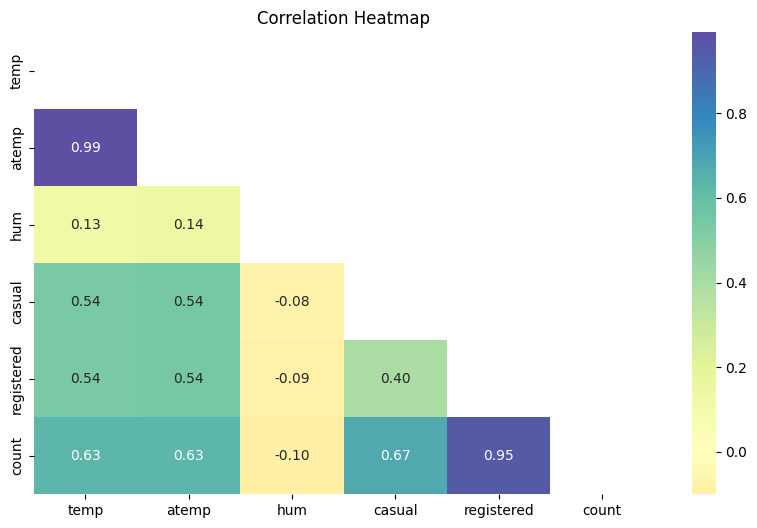

In [55]:
fig, ax = plt.subplots(figsize=(10,6))
correlation_matrix = day_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="Spectral",
    center=0,
    fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Berdasarkan hasil analisis diatas, didapat pernyataan sebagai berikut:

* Atemp dan temp berkorelasi tertinggi (0.99).

* Hum memiliki korelasi rendah dengan temp dan atemp (0.13 dan 0.14).

* Casual cukup berkorelasi dengan temp dan atemp (0.54), dan sedikit negatif dengan hum (-0.08).

* Registered memiliki pola yang sama seperti casual, dan berkorelasi moderat dengan casual (0.40).

* Count berkorelasi tinggi dengan temp, atemp, casual, dan registered (0.63, 0.63, 0.67, dan 0.95), dan sedikit negatif dengan hum (-0.10).

# Visualization & Explanatory Analysis


##Pertanyaan 1 : Apakah cuaca berdampak pada jumlah pengendara sepeda?


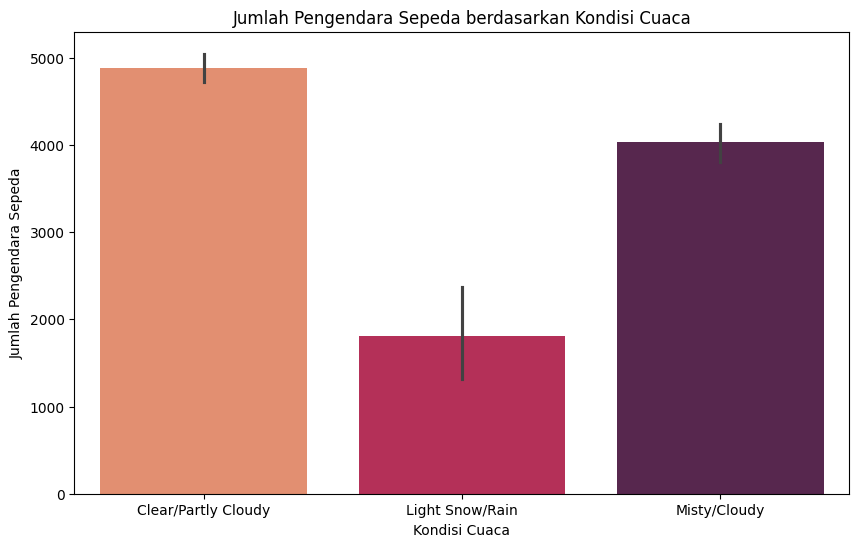

In [109]:
plt.figure(figsize=(10,6))
sns.barplot(x='weather_cond',y='count',hue='weather_cond',data=day_df,palette='rocket_r', dodge=False)

plt.title('Jumlah Pengendara Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengendara Sepeda')
plt.legend([],[], frameon=False)  # Setting legend=False to hide the legend
plt.show()


Berdasarkan output diatas kita dapat mengvisualisasi menggunakan borplot  dan kita dapat kesimpulan bahwa terdapat hubungan antara kondisi cuaca dan penyewa sepeda.

 Ketika kondisi cuaca saat sedang cerah atau berawan menjadi kondisi yang paling diminati, kemudian diikuti dengan cuaca berkabut atau mendung, dan terakhir ketika cuaca sedang sedikit bersalju atau hujan menjadi yang paling sedikit diminati.

##Pertanyaan 2: Apabila sepeda digunakan pada hari kerja, hari libur, dan hari dalam seminggu, tren apa yang dapat terjadi dalam setahun?


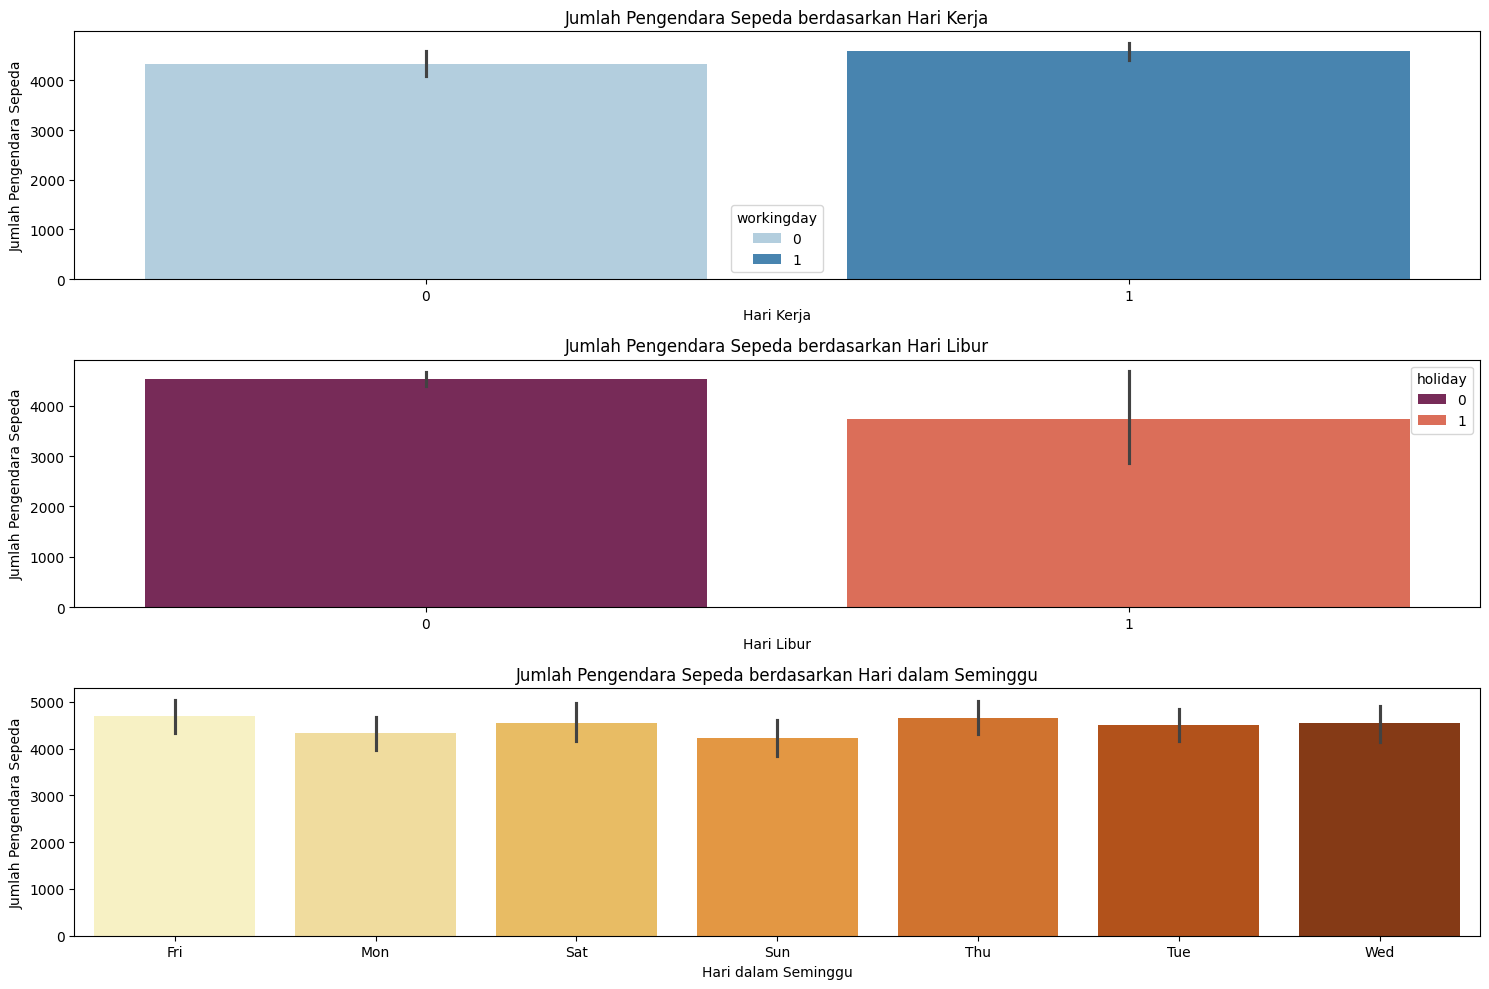

In [111]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,10))

# Berdasarkan workingday
sns.barplot(x='workingday',y='count',hue='workingday',data=day_df,ax=axes[0],palette='Blues',dodge=False)

axes[0].set_title('Jumlah Pengendara Sepeda berdasarkan Hari Kerja')
axes[0].set_xlabel('Hari Kerja')
axes[0].set_ylabel('Jumlah Pengendara Sepeda')

# Berdasarkan holiday
sns.barplot(x='holiday',y='count',hue='holiday',data=day_df,ax=axes[1],palette='rocket',dodge=False)

axes[1].set_title('Jumlah Pengendara Sepeda berdasarkan Hari Libur')
axes[1].set_xlabel('Hari Libur')
axes[1].set_ylabel('Jumlah Pengendara Sepeda')

# Berdasarkan weekday
sns.barplot(x='weekday',y='count',hue='weekday',data=day_df,ax=axes[2],palette='YlOrBr',dodge=False)

axes[2].set_title('Jumlah Pengendara Sepeda berdasarkan Hari dalam Seminggu')
axes[2].set_xlabel('Hari dalam Seminggu')
axes[2].set_ylabel('Jumlah Pengendara Sepeda')

plt.tight_layout()
plt.show()


Berdasarkan output diatas kita dapat mengvisualisasi menggunakan barplot dan kita mendapatkan kesimpulan sebagai berikut:

* Jumlah penyewa sepeda lebih banyak pada hari kerja (yakni senin - jumat) daripada akhir libur (yakni sabtu dan minggu). Nilai 0 menandakan akhir pekan dan 1 menandakan hari kerja.

* Jumlah penyewa sepeda lebih banyak pada hari biasa (bukan hari libur) dibandingkan hari libur (nasional).

* Jumlah penyewa sepeda pada hari Jumat menempati posisi pertama sebagai hari dengan penyewa sepeda terbanyak, dan hari Minggu menempati posisi terakhir dengan jumlah penyewa sepeda yang paling sedikit.

##Pertanyaan 3: Apa pola penggunaan sepeda selama bertahun-tahun? Apakah 2012 atau 2011 lebih baik?


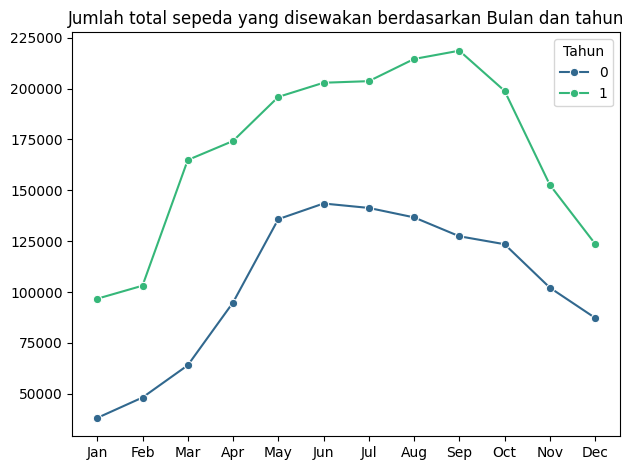

In [112]:

day_df['month'] = pd.Categorical(day_df['month'], categories=
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True)

monthly_counts = day_df.groupby(by=["month","year"]).agg({
    "count": "sum"
}).reset_index()

sns.lineplot(data=monthly_counts,x="month",y="count",hue="year",palette="viridis",marker="o")

plt.title("Jumlah total sepeda yang disewakan berdasarkan Bulan dan tahun")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

Berdasarkan output diatas kita dapat mengvisualisasi menggunakan barplot, dapat disimpulkan bahwa tahun 2012 (yang diwakili oleh angka 1) adalah tahun terbanyak penyewaan mulai dari  bulan Januari sampai bulan Desember.

Pada bulan September adala penyewaan sepeda terbanyak pada tahun 2012, sementara pada bulan Januari penyewaan sepeda paling sedikit.Sedangkan penyewaan sepeda pada tahun 2011 terbanyak yaitu pada bulan Juni dan paling sedikit pada bulan Januari.

##Pertanyaan 4: Apa pengaruh suhu, kelembapan, dan kondisi lainnya terhadap jumlah keseluruhan pengendara sepeda yang biasa maupun terdaftar ?

Text(0.5, 1.0, 'Humidity vs Count')

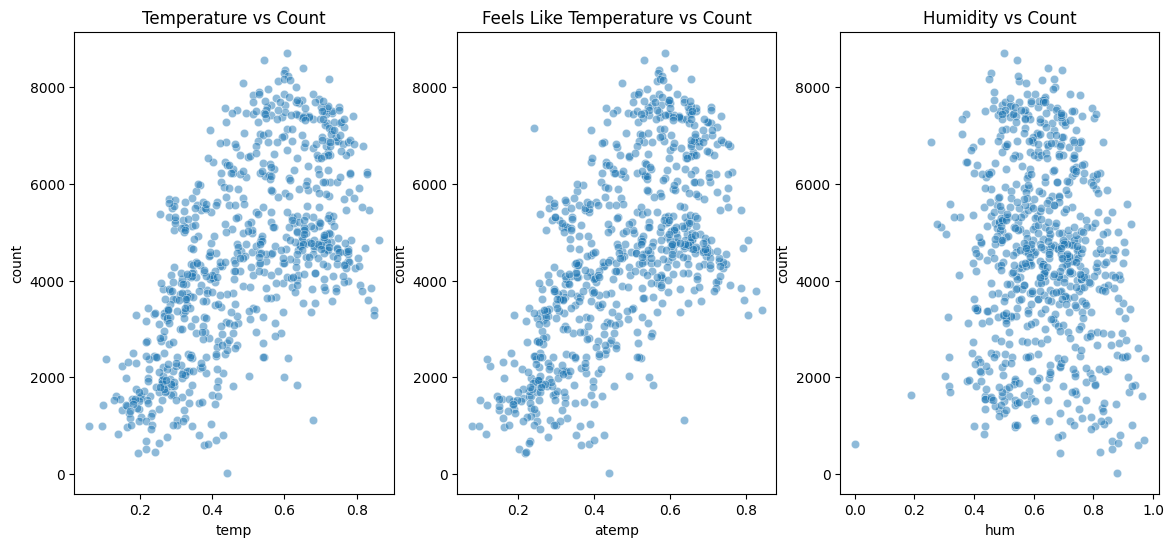

In [102]:

plt.figure(figsize=(14, 6))

# Scatter plot untuk 'temp' vs 'count'
plt.subplot(1, 3, 1)
sns.scatterplot(x='temp',y='count',data=day_df,alpha=0.5)

plt.title('Temperature vs Count')

# Scatter plot untuk 'atemp' vs 'count'
plt.subplot(1, 3, 2)
sns.scatterplot(x='atemp',y='count',data=day_df,alpha=0.5)

plt.title('Feels Like Temperature vs Count')

# Scatter plot untuk 'hum' vs 'count'
plt.subplot(1, 3, 3)
sns.scatterplot(x='hum',y='count',data=day_df,alpha=0.5)

plt.title('Humidity vs Count')


Berdasarkan output diatas kita dapat menganalisis scatter plot dan mendapatkan kesimpulan sebagai berikut:

* Kesinambungan antara temp dan count ternyata menunjukan korelasi yang positif diantara dua variabel.

* Kesinambungan antara atemp dan count ternyata juga menunjukan korelasi yang positif diantara dua variabel.

* Kesinambungan antara hum dan count ternyata menunjukan korelasi yang sedikit negatif, tetapi tidak terlalu signifikan karena condong ke kirinya tidak terlalu terlihat.

Kesimpulannya adalah apabila temperatur (temp dan atemp) meningkat, maka pengguna sepeda juga cenderung meningkat.Sedangkan pengaruh dari humidity sepertinya sangat kecil disini, walaupun cenderung dapat menurunkan jumlah pengguna sepeda.

##Pertanyaan 5: Berdasarkan penyewa yang biasa dan terdaftar, apakah ada dampak musim terhadap penyewa sepeda?

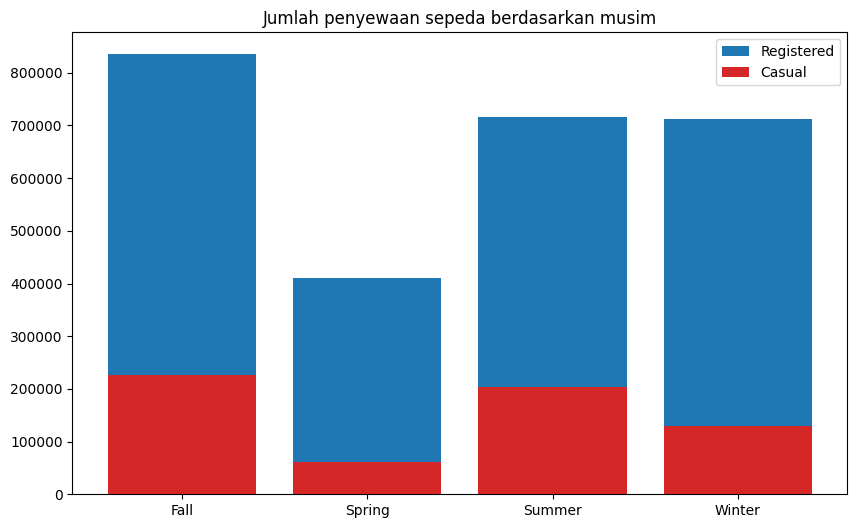

In [118]:
# Pengelompokkan data berdasarkan musim dan menghitung jumlah penggunaan terdaftar dan tidak terdaftar
seasonal_usage = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 6))

# Membuat
plt.bar(seasonal_usage['season'],seasonal_usage['registered'],label='Registered',color='tab:blue')

plt.bar(seasonal_usage['season'],seasonal_usage['casual'],label='Casual',color='tab:red')

plt.xlabel(None)
plt.ylabel(None)
plt.title('Jumlah penyewaan sepeda berdasarkan musim')
plt.legend()
plt.show()

Berdasarkan output diatas kita dapat menganalisis menggunakan barplot. Kesimpulan dari histogram diatas adalah kita dapat mengurutan musim yang paling dinikmati bagi para pengguna sepeda terdaftar dan tidak terdaftar(Casual dan Registered) yaitu :

1. Musim gugur (Fall)
2. Musim panas (Summer)
3. Musim dingin (Winter)
4. Musim semi (Spring).

##Conclusion

* Conclusion pertanyaan 1: Kesinambungan terlihat jelas diantara keduanya. Para penyewa sepeda berantusias ketika cuaca sedang Cerah atau berawan dengan Q3 diatas 6000 dan Q1 kurang dari 4000 serta mediannya hampir 5000. Pada posisi kedua ditempati ketika cuaca sedang berkabut atau mendung dengan Q3 diatas 5000 dan Q1 dibawah 3000 serta mediannya diatas 4000. Pada urutan terakhir pengguna kurang menyukai ketika suasana sedang sedikit bersalju atau hujan dengan Q3 diatas 2000 dan Q1 dibawah 1000 serta mediannya diatas 1000. Sedangkan untuk cuaca ketika badai besar tidak ada datanya, karena memang tidak memungkinan untuk bersepeda ketika kondisi cuaca tersebut.

* Conclusion pertanyaan 2: pada visualisasi ini terbagi menjadi tiga kondisi jumlah pengguna sepeda.Pada urutan pertama di saat hari kerja dari hasil membandingkan dengan bukan hari kerja meskipun hasilnya tidak terlalu signifikan dan berada diatas 4000.Pada urutan kedua bukan hari libur dengan mebandingkan hari libur dan bukan hari libur menghasilkan perbedaaan cukup signifikan.Kemungkin  besar pengguna lebih menyukai sewa sepeda saat hari-hari biasa.Pada urutan terakhir berdasarkan hari dalam seminggu urutan pertama yaitu pada hari Jumat (Fri) dengan mean 4690.288462 dan di urutan terakhir pada hari Minggu (Sun) dengan mean 4228.828571.

* Conclusion pertanyaan 4: Berdasarkan 3 visualisasi yang ditampilkan, dapat disimpulkan bahwa temp dan atemp memiliki korelasi positif dengan count, sehingga jika temperatur (temp dan atemp) meningkat, maka pengguna sepeda juga cenderung meningkat. Terbalik dengan Humidity yang memiliki korelasi negatif dengan count walaupun sangat minim (tidak terlalu signifikan), tetapi tetap dapat menurunkan jumlah pengguna sepeda ketika humiditynya meningkat.

* Conclusion pertanyaan 5: Berdasarkan visualisasi terakhir menghasil perbedaan yang signifikan dimana musim dingin (Winter) tidak menjadi yang terakhir, melainkan yang terakhir adalah musin semi (Spring). Kejadian seperti ini bisa disebabkan oleh banyak faktor seperti kondisi cuaca, temperatur udara, hari kerja, hari libur, dan lain-lain. Sedangkan urutan pertamanya pada ssat musim gugur (Fall) dengan penyewaan sepeda sebanyak lebih dari 800000.

In [121]:
day_df.to_csv("all_data.csv", index=False)